In [11]:
import umap
from sklearn.datasets import load_digits
import os
import glob
import numpy as np
import nibabel as nii
import math
import operator
#import patch_extraction
from scipy.ndimage.interpolation import zoom
from keras.models import load_model
from scipy import ndimage
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#!ls

In [3]:
#reduced_dict=np.load('reduced_volbrain.npy')

In [84]:
file_name_t1='reduced/'+reduced_dict.item(0)['cluster_t1_reduced'][0]
file_name_flair='reduced/'+reduced_dict.item(0)['cluster_flair_reduced'][0]
file_name_listaMASK='reduced/'+reduced_dict.item(0)['cluster_listaMASK_reduced'][0]
file_name_listaLAB='reduced/'+reduced_dict.item(0)['cluster_listaLAB_reduced'][0]

In [139]:
        T1_img = nii.load(file_name_t1)
        T1=T1_img.get_data()
        T1=T1.astype('float32')/255
        FLAIR_img = nii.load(file_name_flair)
        FLAIR=FLAIR_img.get_data()
        FLAIR=FLAIR.astype('float32')/255
        LAB_img = nii.load(file_name_listaLAB)
        LAB=LAB_img.get_data()
        LAB=LAB.astype('float32')*5
        
        MASK_img = nii.load(file_name_listaMASK)
        MASK = MASK_img.get_data()
        MASK=MASK.astype('float32')*5

In [152]:
MASK.max()

5.0

In [137]:
#T1=np.array([T1,T1,T1])

In [140]:
FLAIR=np.expand_dims(FLAIR,axis=4)
FLAIR=np.concatenate((FLAIR,FLAIR,FLAIR),axis=3)

/home/reda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [144]:
FLAIR[:,:,:,0]=FLAIR[:,:,:,0]+LAB
T1=T1*MASK

In [53]:
FLAIR_img.shape
#import matplotlib.pyplot as plt

(181, 217, 181)

In [122]:
T1[:,90,:,:].shape

(3, 217, 181)

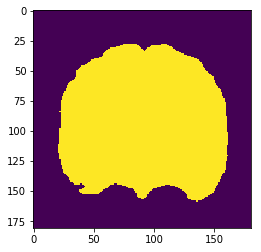

In [156]:
T1_1=np.rot90(T1[90,:,:])
T1_2=np.rot90(T1[:,:,90])
T1_3=np.rot90(T1[:,108,:])

MASK_1=np.rot90(MASK[90,:,:])
MASK_2=np.rot90(MASK[:,:,90])
MASK_3=np.rot90(MASK[:,108,:])

plt.imshow(MASK_3)

In [71]:
FLAIR[90,:,:].shape


In [148]:
plt.imsave('test.png',T1_1,cmap=matplotlib.cm.gray, vmin=20, vmax=260)
plt.imsave('test.png',T1_2,cmap=matplotlib.cm.gray, vmin=20, vmax=260)
plt.imsave('test.png',T1_3,cmap=matplotlib.cm.gray, vmin=20, vmax=260)

plt.imsave('test.png',MASK_1,cmap=matplotlib.cm.gray, vmin=0, vmax=255)
plt.imsave('test.png',MASK_2,cmap=matplotlib.cm.gray, vmin=0, vmax=255)
plt.imsave('test.png',MASK_3,cmap=matplotlib.cm.gray, vmin=0, vmax=255)

plt.imsave('test.png',FLAIR_1, vmin=0, vmax=300)
plt.imsave('test.png',FLAIR_2, vmin=0, vmax=300)
plt.imsave('test.png',FLAIR_3, vmin=0, vmax=300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [83]:
cluster='cluster_18/'

In [84]:
listaT1 = sorted(glob.glob('reduced/'+cluster+"n_*t1*.nii"))
listaFLAIR = sorted(glob.glob('reduced/'+cluster+"n_*flair*.nii"))
listaLAB = sorted(glob.glob('reduced/'+cluster+"wmhlesion*.nii*"))
listaMASK = sorted(glob.glob('reduced/'+cluster+"mask*.nii"))
numfiles=len(listaT1)

In [85]:
len(listaFLAIR)

177

In [86]:
for i in range(numfiles):

    T1_img = nii.load(listaT1[i])
    T1=T1_img.get_data()
    T1=T1.astype('float32')/255
    FLAIR_img = nii.load(listaFLAIR[i])
    FLAIR=FLAIR_img.get_data()
    FLAIR=FLAIR.astype('float32')/255
    LAB_img = nii.load(listaLAB[i])
    LAB=LAB_img.get_data()
    LAB=LAB.astype('float32')*5
        
    MASK_img = nii.load(listaMASK[i])
    MASK = MASK_img.get_data()
    MASK=MASK.astype('float32')*1
    
    
    FLAIR=np.expand_dims(FLAIR,axis=4)
    FLAIR=np.concatenate((FLAIR,FLAIR,FLAIR),axis=3)
    
    FLAIR[:,:,:,0]=FLAIR[:,:,:,0]+LAB
    T1=T1*MASK
    
    T1_1=np.rot90(T1[90,:,:])
    T1_2=np.rot90(T1[:,:,90])
    T1_3=np.rot90(T1[:,108,:])
    FLAIR_1=np.rot90(FLAIR[90,:,:,:])
    FLAIR_2=np.rot90(FLAIR[:,:,90,:])
    FLAIR_3=np.rot90(FLAIR[:,108,:,:])
    MASK_1=np.rot90(MASK[90,:,:])
    MASK_2=np.rot90(MASK[:,:,90])
    MASK_3=np.rot90(MASK[:,108,:])
    
    plt.imsave('test_images/'+str(i)+'_T1_1.png',T1_1,cmap=matplotlib.cm.gray, vmin=20/255, vmax=260/255)
    plt.imsave('test_images/'+str(i)+'_T1_2.png',T1_2,cmap=matplotlib.cm.gray, vmin=20/255, vmax=260/255)
    plt.imsave('test_images/'+str(i)+'_T1_3.png',T1_3,cmap=matplotlib.cm.gray, vmin=20/255, vmax=260/255)

    plt.imsave('test_images/'+str(i)+'_MASK_1.png',MASK_1,cmap=matplotlib.cm.gray, vmin=0, vmax=1)
    plt.imsave('test_images/'+str(i)+'_MASK_2.png',MASK_2,cmap=matplotlib.cm.gray, vmin=0, vmax=1)
    plt.imsave('test_images/'+str(i)+'_MASK_3.png',MASK_3,cmap=matplotlib.cm.gray, vmin=0, vmax=1)

    plt.imsave('test_images/'+str(i)+'_FLAIR_1.png',FLAIR_1, vmin=0, vmax=300)
    plt.imsave('test_images/'+str(i)+'_FLAIR_2.png',FLAIR_2, vmin=0, vmax=300)
    plt.imsave('test_images/'+str(i)+'_FLAIR_3.png',FLAIR_3, vmin=0, vmax=300)

/home/reda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid ra

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i